# Loan Approval Prediction: 
### EDA + Decision Tree, Random Forest & Logistic Regression Modeling

## Introduction
we are going to work on **binary classification problem**,
where we got some information about sample of people , and we need to predict whether we should give some one a loan or not depending on his information .
we actually have a few sample size (614 rows), so we will go with machine learning techniques to solve our problem .

### Problem Statement:

__About Company__ <br>
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

__Problem__ <br>
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

#### Dataset Description:

| Variable | Description | 
|------|------|
| Loan_ID | Unique Loan ID | 
| Gender | Male/ Female | 
| Married | Applicant married (Y/N) | 
| Dependents | Number of dependents | 
| Education | Applicant Education (Graduate/ Under Graduate) | 
| Self_Employed | Self employed (Y/N) | 
| ApplicantIncome | Applicant income | 
| CoapplicantIncome | Coapplicant income | 
| LoanAmount | Loan amount in thousands | 
| Loan_Amount_Term | Term of loan in months | 
| Credit_History | credit history meets guidelines | 
| Property_Area | Urban/ Semi Urban/ Rural | 
| Loan_Status | Loan approved (Y/N) | 


In [1]:
# Importing the Libriries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the data
train_df = pd.read_csv("train.csv")
train_df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Observation
1. We can see that the dataframe consists of 13 columns, all of them are self explanatory.
2. there are some missing values and some numerical and categorical columns


In [3]:
# Discription of the numercial data

train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
# Description of the categorical data
## But first changing the cridit_history column to object insted of float
train_df["Credit_History"] = train_df["Credit_History"].astype("O")
train_df["Loan_Amount_Term"] = train_df["Loan_Amount_Term"].astype("O")

train_df.describe(include="O")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,600.0,564.0,614,614
unique,614,2,2,4,2,2,10.0,2.0,3,2
top,LP001002,Male,Yes,0,Graduate,No,360.0,1.0,Semiurban,Y
freq,1,489,398,345,480,500,512.0,475.0,233,422


In [5]:
# we will drop ID because it's not important for our model and it will just mislead the model

train_df.drop('Loan_ID', axis=1, inplace=True)

In [6]:
# Checking for duplicates
train_df.duplicated().any()

False

In [7]:
# Separate categorical and numerical columns
cat_col = []
num_col = []

for i,j in enumerate(train_df.dtypes):
    if j == object:
        cat_col.append(train_df.dtypes.index[i])
    else :
        num_col.append(train_df.dtypes.index[i])
print("The categorical columns in the data are : ",cat_col)
print("\nThe numercial columns in the data are : ",num_col)

The categorical columns in the data are :  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

The numercial columns in the data are :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


### Analyze data assigned to columns


ValueError: Could not interpret input 'L'

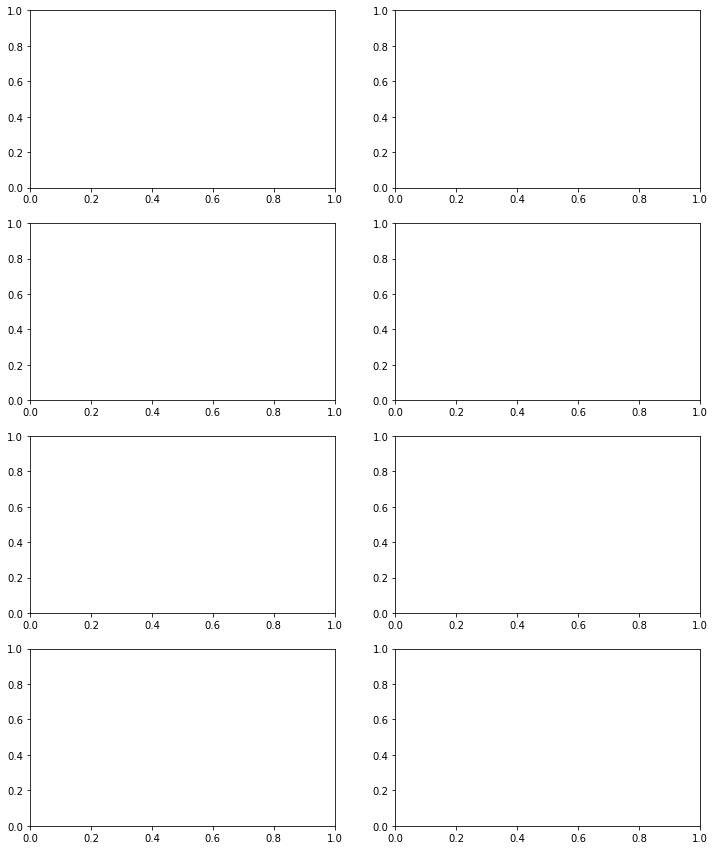

In [9]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(cat_col):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

